# Setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras import layers
import os
import shutil
from sklearn.model_selection import train_test_split

In [49]:
# Define paths
data_dir = r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\eye_state"
base_dir = r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\split_data"

# Create directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Xóa và tạo lại thư mục
for folder in [train_dir, val_dir, test_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# Split data
classes = os.listdir(data_dir)
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in images]
    
    # Lấy ngẫu nhiên 50% số ảnh
    np.random.seed(42)
    np.random.shuffle(images)
    subset_size = len(images) // 2
    images = images[:subset_size]
    
    # Split thành train, validation, và test (0.7, 0.15, 0.15)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=np.random.randint(1000))
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=np.random.randint(1000))
    
    # Tạo thư mục cho từng class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Copy ảnh
    for img in train_imgs:
        shutil.copy(img, os.path.join(train_dir, class_name))
    for img in val_imgs:
        shutil.copy(img, os.path.join(val_dir, class_name))
    for img in test_imgs:
        shutil.copy(img, os.path.join(test_dir, class_name))

print("Number of images in each class after reduction:")
for class_name in classes:
    n_train = len(os.listdir(os.path.join(train_dir, class_name)))
    n_val = len(os.listdir(os.path.join(val_dir, class_name)))
    n_test = len(os.listdir(os.path.join(test_dir, class_name)))
    print(f"\n{class_name}:")
    print(f"Train: {n_train}")
    print(f"Validation: {n_val}")
    print(f"Test: {n_test}")

Number of images in each class after reduction:

close:
Train: 14681
Validation: 3146
Test: 3146

open:
Train: 15033
Validation: 3221
Test: 3222
Found 29714 images belonging to 2 classes.
Found 6367 images belonging to 2 classes.
Found 6368 images belonging to 2 classes.


In [7]:
train_dir = r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\split_data\train" 
val_dir =  r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\split_data\validation"
test_dir = r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\split_data\test"

# Set up ImageDataGenerators 
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=10,  # Xoay ảnh trong khoảng ±10 độ
    width_shift_range=0.1,  # Dịch chuyển ngang 10%
    height_shift_range=0.1,  # Dịch chuyển dọc 10%
    brightness_range=[0.8,1.2],  # Điều chỉnh độ sáng
    zoom_range=0.1,  # Zoom in/out 10%
    fill_mode='nearest',
    preprocessing_function=lambda x: x * (1 + 0.1 * np.random.uniform(-1, 1))  # Thêm nhiễu ngẫu nhiên
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

Found 29714 images belonging to 2 classes.
Found 6367 images belonging to 2 classes.
Found 6368 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


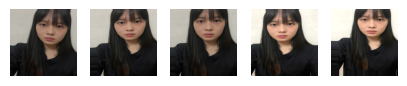

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn đến hình ảnh
image_path = r"C:\Users\LOAN\OneDrive\Pictures\Saved Pictures\z6103415712051_c97137d79c4a062b9185c3283b5f35b0.jpg"

# Load hình ảnh
img = load_img(image_path, target_size=(224, 224))  # Resize ảnh về kích thước (224, 224)
img_array = img_to_array(img)  # Chuyển thành numpy array
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (batch size = 1)

# Khởi tạo ImageDataGenerator với các phép biến đổi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    fill_mode='nearest',
    preprocessing_function=lambda x: x * (1 + 0.1 * np.random.uniform(-1, 1))  # Thêm nhiễu ngẫu nhiên
)

# Áp dụng các phép biến đổi
augmented_images = datagen.flow(img_array, batch_size=1)

# Hiển thị một vài ảnh đã biến đổi
plt.figure(figsize=(5, 5))
for i in range(5):  # Hiển thị 5 ảnh
    batch = next(augmented_images)  # Lấy một ảnh từ generator
    aug_img = batch[0]  # Bỏ chiều batch
    plt.subplot(1, 5, i + 1)
    plt.imshow(aug_img)
    plt.axis('off')
plt.show()

# Create the model (Alexnet)

In [11]:
alexnet_model = Sequential([
    # Block 1: First Convolutional Layer
    Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', padding='same', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    # Block 2: Second Convolutional Layer
    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    # Block 3: Third Convolutional Layer
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    
    # Block 4: Fourth Convolutional Layer
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    
    # Block 5: Fifth Convolutional Layer
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    # Flatten the feature maps
    Flatten(),
    
    # Fully Connected Layers
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # Output Layer (SoftMax)
    Dense(2, activation='softmax')  # Assuming 2 classes for ImageNet
])

# Print the model summary
alexnet_model.summary()

C:\Users\LOAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 57, 57, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,289,538 (222.36 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

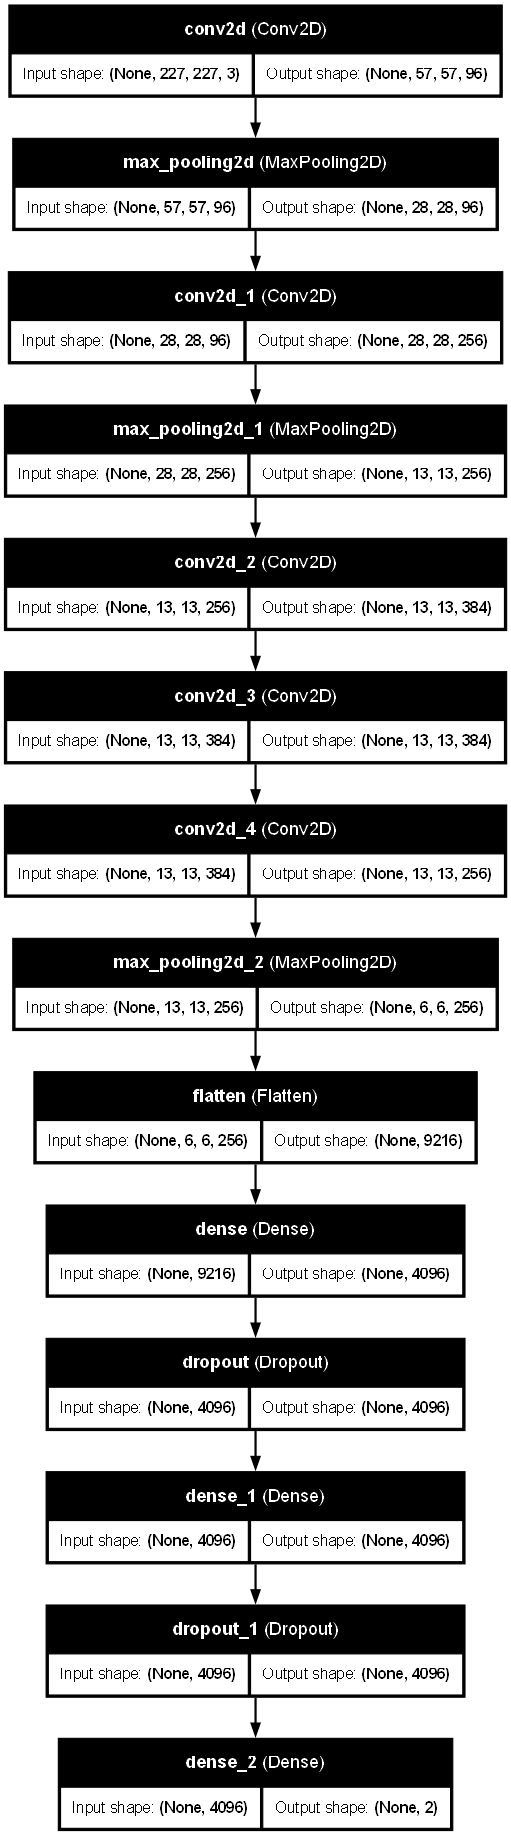

In [15]:
plot_model(alexnet_model, to_file='AlexNet_model_architecture.png', show_shapes=True, show_layer_names=True, dpi=80)

In [70]:
from tensorflow.keras.optimizers import SGD

alexnet_model.compile(
    loss='categorical_crossentropy',                            # Loss function
    optimizer=SGD(learning_rate=0.001, momentum=0.9),           # SGD optimizer with momentum
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall()]                          # Metrics to track during training
)

In [72]:
history = alexnet_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
929/929 ━━━━━━━━━━━━━━━━━━━━ 1171s 1s/step - categorical_accuracy: 0.6004 - loss: 0.6372 - precision_4: 0.6004 - recall_4: 0.6004 - val_categorical_accuracy: 0.8841 - val_loss: 0.2860 - val_precision_4: 0.8841 - val_recall_4: 0.8841
Epoch 2/10
929/929 ━━━━━━━━━━━━━━━━━━━━ 963s 1s/step - categorical_accuracy: 0.8661 - loss: 0.3252 - precision_4: 0.8661 - recall_4: 0.8661 - val_categorical_accuracy: 0.9402 - val_loss: 0.1556 - val_precision_4: 0.9402 - val_recall_4: 0.9402
Epoch 3/10
929/929 ━━━━━━━━━━━━━━━━━━━━ 943s 1s/step - categorical_accuracy: 0.9215 - loss: 0.2047 - precision_4: 0.9215 - recall_4: 0.9215 - val_categorical_accuracy: 0.9541 - val_loss: 0.1267 - val_precision_4: 0.9541 - val_recall_4: 0.9541
Epoch 4/10
929/929 ━━━━━━━━━━━━━━━━━━━━ 921s 992ms/step - categorical_accuracy: 0.9381 - loss: 0.1636 - precision_4: 0.9381 - recall_4: 0.9381 - val_categorical_accuracy: 0.9614 - val_loss: 0.1081 - val_precision_4: 0.9614 - val_recall_4: 0.9614
Epoch 5/10
929/929 ━━━━━

# Visualize the results

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2)

  fig.set_size_inches(18.5, 10.5)

  # Plot loss
  ax1.set_title('Loss')
  ax1.plot(history.history['loss'], label = 'train')
  ax1.plot(history.history['val_loss'], label = 'test')
  ax1.set_ylabel('Loss')
  
  # Determine upper bound of y-axis
  max_loss = max(history.history['loss'] + history.history['val_loss'])

  ax1.set_ylim([0, np.ceil(max_loss)])
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation']) 

  # Plot accuracy
  ax2.set_title('Accuracy')
  ax2.plot(history.history['categorical_accuracy'],  label = 'train')
  ax2.plot(history.history['val_categorical_accuracy'], label = 'test')
  ax2.set_ylabel('Accuracy')
  ax2.set_ylim([0, 1])
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.show()

plot_history(history)

NameError: name 'history' is not defined

In [1]:
print(history.history.keys())

NameError: name 'history' is not defined

# Evaluate the model

In [86]:
alexnet_model.evaluate(test_generator, return_dict=True)

199/199 ━━━━━━━━━━━━━━━━━━━━ 68s 344ms/step - categorical_accuracy: 0.9734 - loss: 0.0673 - precision_4: 0.9734 - recall_4: 0.9734


{'categorical_accuracy': 0.9802135825157166,
 'loss': 0.0558168850839138,
 'precision_4': 0.9802135825157166,
 'recall_4': 0.9802135825157166}

# Save the model

In [93]:
alexnet_model.save(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\drowsiness_alexnet_model.h5")

# Driver Drowsiness system

In [23]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

mixer.init()
sound = mixer.Sound(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\alarm.wav.mp3")

face = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_frontalface_alt.xml")
leye = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_lefteye_2splits.xml")
reye = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_righteye_2splits.xml")

lbl = ['Close', 'Open']
model = load_model(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\drowsiness_alexnet_model.h5")
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = [99]
lpred = [99]

while (True):
    ret, frame = cap.read()
    height, width = frame.shape[:2]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Sử dụng màu xám cho phát hiện mắt

    faces = face.detectMultiScale(gray, minNeighbors=5, scaleFactor=1.1, minSize=(25, 25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0, height - 50), (200, height), (0, 0, 0), thickness=cv2.FILLED)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 100, 100), 1)

    if len(right_eye) > 0:  # Kiểm tra xem có phát hiện mắt phải không
        for (x, y, w, h) in right_eye:
            r_eye = frame[y:y + h, x:x + w]
            r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2RGB)
            r_eye = cv2.resize(r_eye, (224, 224))
            r_eye = r_eye.reshape((-1, 224, 224, 3))

            rpred = np.argmax(model.predict(r_eye), axis=-1)
            print("Right Eye Prediction:", rpred)  # Thêm thông báo để theo dõi giá trị
            break

    if len(left_eye) > 0:  # Kiểm tra xem có phát hiện mắt trái không
        for (x, y, w, h) in left_eye:
            l_eye = frame[y:y + h, x:x + w]
            l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2RGB)
            l_eye = cv2.resize(l_eye, (224, 224))
            l_eye = l_eye.reshape((-1, 224, 224, 3))

            lpred = np.argmax(model.predict(l_eye), axis=-1)
            print("Left Eye Prediction:", lpred)  # Thêm thông báo để theo dõi giá trị
            break

    if (rpred[0] == 0 and lpred[0] == 0):
        score += 1
        cv2.putText(frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    else:
        score -= 1
        cv2.putText(frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

    if (score < 0):
        score = 0
    cv2.putText(frame, 'Score:' + str(score), (100, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

    if (score > 12):
        cv2.putText(frame, "ALERT: DROWSY!", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
        cv2.imwrite(os.path.join(path, 'image.jpg'), frame)
        try:
            sound.play()
        except:  # isplaying = False
            pass

        if (thicc < 16):
            thicc += 2
        else:
            thicc -= 2
            if (thicc < 2):
                thicc = 2
        cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Right Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Right Ey